In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Read the CSV file
file_path = 'Acetyl.csv'  # replace with your actual file path
data = pd.read_csv(file_path)

In [3]:
data

SMILES  activity  MACCSFP1  \
0    O=S(=O)(N=S(=O)([O-])C(F)(F)F)C(F)(F)F.OCC[n+]...      2.65         0   
1    CCOC[N+]1(C)CCCCC1.O=S(=O)(NS(=O)(=O)C(F)(F)F)...      1.80         0   
2    COCCC[N+]1(C)CCOCC1.O=S(=O)(NS(=O)(=O)C(F)(F)F...      2.66         0   
3    COCCC[N+]1(C)CCCCC1.O=S(=O)(N=S(=O)([O-])C(F)(...      2.27         0   
4    CCOCC[n+]1ccccc1.O=S(=O)(NS(=O)(=O)C(F)(F)F)C(...      1.12         0   
..                                                 ...       ...       ...   
480  C[N+]1(CCCO)CCOCC1.O=S(=O)([N-]S(=O)(=O)C(F)(F...      3.00         0   
481                            COCC[N+]1(C)CCCC1.[Cl-]      2.38         0   
482              CC[n+]1ccn(C)c1.O=S(=O)([O-])C(F)(F)F      2.13         0   
483  CCCCCCOC[n+]1cccc(O)c1.O=C([O-])c1cccc2c1C(=O)...      3.60         0   
484  COCCn1cc[n+](C)c1.O=S(=O)(NS(=O)(=O)C(F)(F)F)C...      2.10         0   

     MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  MACCSFP7  MACCSFP8  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
480         0         0         0         0         0         0         0   
481         0         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   
483         0         0         0         0         0         0         0   
484         0         0         0         0         0         0         0   

     ...  MACCSFP157  MACCSFP158  MACCSFP159  MACCSFP160  MACCSFP161  \
0    ...           1           1           1           0           1   
1    ...           1           1           1           1           1   
2    ...           1           1           1           1           1   
3    ...           1           1           1           1           1   
4    ...           1           1           1           1           1   
..   ...         ...         ...         ...         ...         ...   
480  ...           1           1           1           1           1   
481  ...           1           1           0           1           1   
482  ...           0           1           1           1           1   
483  ...           1           1           1           1           1   
484  ...           1           1           1           1           1   

     MACCSFP162  MACCSFP163  MACCSFP164  MACCSFP165  MACCSFP166  
0             1           1           1           1           1  
1             0           1           1           1           1  
2             0           1           1           1           1  
3             0           1           1           1           1  
4             1           1           1           1           1  
..          ...         ...         ...         ...         ...  
480           0           1           1           1           1  
481           0           0           1           1           1  
482           1           0           1           1           1  
483           1           1           1           1           1  
484           1           0           1           1           1  

[485 rows x 168 columns]

In [4]:
# Step 2: Extract the target variable and features
target = data.activity  # 6th column as target
features = data.drop(columns=['SMILES','activity'])
features.shape

(485, 166)

In [5]:
features

MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  MACCSFP7  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
480         0         0         0         0         0         0         0   
481         0         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   
483         0         0         0         0         0         0         0   
484         0         0         0         0         0         0         0   

     MACCSFP8  MACCSFP9  MACCSFP10  ...  MACCSFP157  MACCSFP158  MACCSFP159  \
0           0         0          0  ...           1           1           1   
1           0         0          0  ...           1           1           1   
2           0         0          0  ...           1           1           1   
3           0         0          0  ...           1           1           1   
4           0         0          0  ...           1           1           1   
..        ...       ...        ...  ...         ...         ...         ...   
480         0         0          0  ...           1           1           1   
481         0         0          0  ...           1           1           0   
482         0         0          0  ...           0           1           1   
483         0         0          0  ...           1           1           1   
484         0         0          0  ...           1           1           1   

     MACCSFP160  MACCSFP161  MACCSFP162  MACCSFP163  MACCSFP164  MACCSFP165  \
0             0           1           1           1           1           1   
1             1           1           0           1           1           1   
2             1           1           0           1           1           1   
3             1           1           0           1           1           1   
4             1           1           1           1           1           1   
..          ...         ...         ...         ...         ...         ...   
480           1           1           0           1           1           1   
481           1           1           0           0           1           1   
482           1           1           1           0           1           1   
483           1           1           1           1           1           1   
484           1           1           1           0           1           1   

     MACCSFP166  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
480           1  
481           1  
482           1  
483           1  
484           1  

[485 rows x 166 columns]

In [6]:
target

0      2.65
1      1.80
2      2.66
3      2.27
4      1.12
       ... 
480    3.00
481    2.38
482    2.13
483    3.60
484    2.10
Name: activity, Length: 485, dtype: float64

In [7]:
# remove missing values from features
features = features.dropna(axis='columns')
features.shape

(485, 166)

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: If features is a NumPy array, convert it back to DataFrame with dummy column names
if isinstance(features, np.ndarray):
    features = pd.DataFrame(features, columns=[f'feature_{i}' for i in range(features.shape[1])])

# Step 2: Keep only numeric columns
features = features.select_dtypes(include=[np.number])

# Step 3: Replace inf/-inf with NaN
features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 4: Replace NaNs with 0 (or use .fillna(method='ffill') if you prefer imputation)
features.fillna(0.0, inplace=True)

# Step 5: Now scale
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


In [9]:
# Step 4: Perform Min-Max Normalization on the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [10]:
# Step 5: Split the normalized data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a fixed seed
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, shuffle=True)

In [11]:
import pandas as pd

# Convert X_train and X_test arrays to dataframes
X_train= pd.DataFrame(X_train, columns=features.columns)
X_test = pd.DataFrame(X_test, columns=features.columns)
X_train

MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  MACCSFP7  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
..        ...       ...       ...       ...       ...       ...       ...   
383       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
384       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
385       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
386       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
387       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     MACCSFP8  MACCSFP9  MACCSFP10  ...  MACCSFP157  MACCSFP158  MACCSFP159  \
0         0.0       0.0        0.0  ...         0.0         1.0         0.0   
1         0.0       0.0        0.0  ...         0.0         1.0         0.0   
2         0.0       0.0        0.0  ...         1.0         1.0         1.0   
3         0.0       0.0        0.0  ...         0.0         1.0         1.0   
4         0.0       0.0        0.0  ...         1.0         1.0         1.0   
..        ...       ...        ...  ...         ...         ...         ...   
383       0.0       0.0        0.0  ...         0.0         1.0         1.0   
384       0.0       0.0        0.0  ...         1.0         1.0         1.0   
385       0.0       0.0        0.0  ...         1.0         1.0         1.0   
386       0.0       0.0        0.0  ...         0.0         1.0         0.0   
387       0.0       0.0        0.0  ...         1.0         1.0         1.0   

     MACCSFP160  MACCSFP161  MACCSFP162  MACCSFP163  MACCSFP164  MACCSFP165  \
0           1.0         1.0         0.0         0.0         0.0         1.0   
1           1.0         1.0         1.0         0.0         1.0         1.0   
2           1.0         1.0         0.0         1.0         1.0         1.0   
3           1.0         1.0         0.0         0.0         1.0         0.0   
4           1.0         1.0         0.0         0.0         1.0         0.0   
..          ...         ...         ...         ...         ...         ...   
383         1.0         1.0         0.0         0.0         1.0         0.0   
384         1.0         1.0         1.0         1.0         1.0         1.0   
385         1.0         1.0         0.0         0.0         1.0         1.0   
386         1.0         1.0         1.0         0.0         0.0         1.0   
387         1.0         1.0         1.0         0.0         1.0         1.0   

     MACCSFP166  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
..          ...  
383         1.0  
384         1.0  
385         1.0  
386         1.0  
387         1.0  

[388 rows x 166 columns]

In [12]:
y_train

34     1.92
256    2.79
338    2.34
63     3.00
11     3.00
       ... 
150    2.60
9      2.90
186    2.61
317    2.30
472    2.36
Name: activity, Length: 388, dtype: float64

In [13]:
X_test

MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  MACCSFP7  \
0        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
..       ...       ...       ...       ...       ...       ...       ...   
92       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
93       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
94       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
95       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
96       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

    MACCSFP8  MACCSFP9  MACCSFP10  ...  MACCSFP157  MACCSFP158  MACCSFP159  \
0        0.0       0.0        0.0  ...         0.0         1.0         0.0   
1        0.0       0.0        0.0  ...         0.0         1.0         0.0   
2        0.0       0.0        0.0  ...         1.0         1.0         0.0   
3        0.0       0.0        0.0  ...         1.0         1.0         1.0   
4        0.0       0.0        0.0  ...         0.0         1.0         0.0   
..       ...       ...        ...  ...         ...         ...         ...   
92       0.0       0.0        0.0  ...         1.0         1.0         1.0   
93       0.0       0.0        0.0  ...         1.0         1.0         1.0   
94       0.0       0.0        0.0  ...         1.0         1.0         1.0   
95       0.0       0.0        0.0  ...         0.0         1.0         1.0   
96       0.0       0.0        0.0  ...         1.0         1.0         0.0   

    MACCSFP160  MACCSFP161  MACCSFP162  MACCSFP163  MACCSFP164  MACCSFP165  \
0          1.0         1.0         1.0         0.0         0.0         1.0   
1          1.0         1.0         1.0         1.0         0.0         1.0   
2          1.0         1.0         1.0         0.0         1.0         1.0   
3          1.0         1.0         0.0         0.0         1.0         0.0   
4          1.0         1.0         1.0         0.0         0.0         1.0   
..         ...         ...         ...         ...         ...         ...   
92         1.0         1.0         1.0         1.0         1.0         1.0   
93         1.0         1.0         1.0         1.0         1.0         1.0   
94         0.0         1.0         1.0         1.0         1.0         1.0   
95         1.0         1.0         0.0         1.0         1.0         1.0   
96         1.0         1.0         1.0         0.0         1.0         1.0   

    MACCSFP166  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
..         ...  
92         1.0  
93         1.0  
94         1.0  
95         1.0  
96         1.0  

[97 rows x 166 columns]

In [14]:
y_test

224    1.98
92     1.31
157    2.96
402    2.55
390    2.12
       ... 
17     2.14
304    1.52
74     2.56
123    1.78
243    2.27
Name: activity, Length: 97, dtype: float64

In [15]:
#Embedding method for feature selection: Lasso regression (L1-regularisation)
from sklearn.linear_model import LassoCV

# Initialize Lasso with cross-validation to automatically select the best alpha
lasso = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)

# Get the coefficients of the features
coef = lasso.coef_

# Select features where coefficients are not zero
selected_features = X_train.columns[(coef != 0)]

# Transform the features to include only the selected ones
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [16]:
print(f"Number of selected features: {len(selected_features)}")
print("Selected features:")
print(selected_features.tolist())

Number of selected features: 69
Selected features:
['MACCSFP3', 'MACCSFP29', 'MACCSFP30', 'MACCSFP31', 'MACCSFP33', 'MACCSFP36', 'MACCSFP41', 'MACCSFP42', 'MACCSFP43', 'MACCSFP46', 'MACCSFP51', 'MACCSFP57', 'MACCSFP59', 'MACCSFP66', 'MACCSFP67', 'MACCSFP69', 'MACCSFP72', 'MACCSFP74', 'MACCSFP75', 'MACCSFP78', 'MACCSFP79', 'MACCSFP80', 'MACCSFP81', 'MACCSFP82', 'MACCSFP84', 'MACCSFP85', 'MACCSFP86', 'MACCSFP89', 'MACCSFP91', 'MACCSFP97', 'MACCSFP98', 'MACCSFP100', 'MACCSFP105', 'MACCSFP108', 'MACCSFP109', 'MACCSFP110', 'MACCSFP113', 'MACCSFP114', 'MACCSFP115', 'MACCSFP116', 'MACCSFP119', 'MACCSFP120', 'MACCSFP121', 'MACCSFP123', 'MACCSFP126', 'MACCSFP127', 'MACCSFP128', 'MACCSFP129', 'MACCSFP132', 'MACCSFP138', 'MACCSFP139', 'MACCSFP141', 'MACCSFP142', 'MACCSFP144', 'MACCSFP145', 'MACCSFP148', 'MACCSFP149', 'MACCSFP151', 'MACCSFP152', 'MACCSFP153', 'MACCSFP154', 'MACCSFP156', 'MACCSFP157', 'MACCSFP158', 'MACCSFP161', 'MACCSFP162', 'MACCSFP163', 'MACCSFP164', 'MACCSFP165']


(MLR):
-- Training --
MSE: 0.06101626040128105, MAE: 0.1862659290276232, RMSE: 0.24701469673135049, R^2: 0.8810778458608512
-- Testing --
MSE: 0.15296615316655746, MAE: 0.2706496438622077, RMSE: 0.3911088763586905, R^2: 0.7193938468988883

Random Forest:
-- Training --
MSE: 0.026364519736230437, MAE: 0.0993013093192603, RMSE: 0.1623715484197599, R^2: 0.9486149190517943
-- Testing --
MSE: 0.10080431508996074, MAE: 0.228512138543015, RMSE: 0.31749695288295404, R^2: 0.8150812419098581

SVM (RBF):
-- Training --
MSE: 0.04949794782569402, MAE: 0.1431319077262473, RMSE: 0.22248134264628577, R^2: 0.9035273131754378
-- Testing --
MSE: 0.10048785323286821, MAE: 0.22023295571670778, RMSE: 0.3169981912138746, R^2: 0.8156617699710251

KNN Regressor:
-- Training --
MSE: 0.08358162886597939, MAE: 0.21046391752577318, RMSE: 0.28910487520271844, R^2: 0.8370974018100847
-- Testing --
MSE: 0.15935406185567014, MAE: 0.3053195876288661, RMSE: 0.39919176075624374, R^2: 0.7076756566554471

Decision Tree:
--

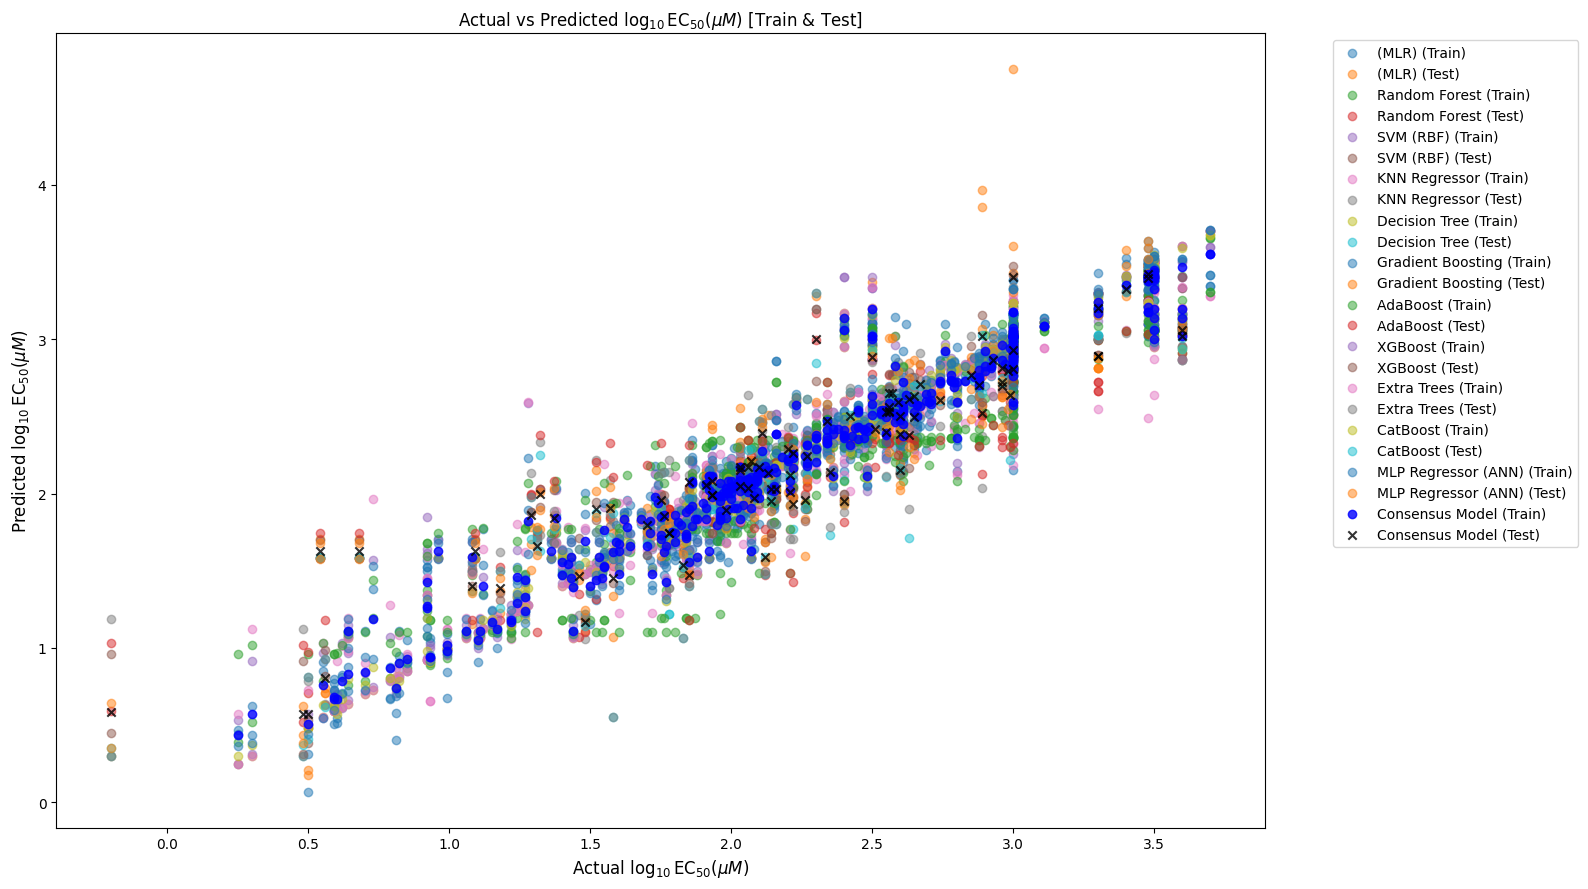

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 6: Define models (including ANN)
models = {
    '(MLR)': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVM (RBF)': SVR(kernel='rbf'),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, silent=True),
    'MLP Regressor (ANN)': MLPRegressor(hidden_layer_sizes=(64, 32, 16), activation='relu', max_iter=500, random_state=42)
}

# Step 7: Train and evaluate each model
results = {}
predictions_train = {}  # Store train predictions for consensus
predictions_test = {}   # Store test predictions for consensus

for name, model in models.items():
    # Train the model
    model.fit(X_train_selected, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)
    
    # Store predictions for consensus
    predictions_train[name] = y_train_pred
    predictions_test[name] = y_test_pred
    
    # Metrics for training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Metrics for testing set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Train RMSE': train_rmse,
        'Train R^2': train_r2,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse,
        'Test R^2': test_r2
    }
    
    # Print evaluation results
    print(f'{name}:')
    print(f'-- Training --')
    print(f'MSE: {train_mse}, MAE: {train_mae}, RMSE: {train_rmse}, R^2: {train_r2}')
    print(f'-- Testing --')
    print(f'MSE: {test_mse}, MAE: {test_mae}, RMSE: {test_rmse}, R^2: {test_r2}')
    print()

# Step 8: Consensus Model (average predictions)
# Compute consensus predictions for train and test
consensus_train_pred = np.mean(np.column_stack(list(predictions_train.values())), axis=1)
consensus_test_pred = np.mean(np.column_stack(list(predictions_test.values())), axis=1)

# Metrics for training set
consensus_train_mse = mean_squared_error(y_train, consensus_train_pred)
consensus_train_mae = mean_absolute_error(y_train, consensus_train_pred)
consensus_train_rmse = np.sqrt(consensus_train_mse)
consensus_train_r2 = r2_score(y_train, consensus_train_pred)

# Metrics for testing set
consensus_test_mse = mean_squared_error(y_test, consensus_test_pred)
consensus_test_mae = mean_absolute_error(y_test, consensus_test_pred)
consensus_test_rmse = np.sqrt(consensus_test_mse)
consensus_test_r2 = r2_score(y_test, consensus_test_pred)

# Print Consensus Model Results
print('Consensus Model:')
print('-- Training --')
print(f'MSE: {consensus_train_mse}, MAE: {consensus_train_mae}, RMSE: {consensus_train_rmse}, R^2: {consensus_train_r2}')
print('-- Testing --')
print(f'MSE: {consensus_test_mse}, MAE: {consensus_test_mae}, RMSE: {consensus_test_rmse}, R^2: {consensus_test_r2}')
print()

# Step 9: Visualize the results for each model and consensus
plt.figure(figsize=(16, 9))

# Plot for individual models
for name, model in models.items():
    y_train_pred = predictions_train[name]
    y_test_pred = predictions_test[name]
    plt.scatter(y_train, y_train_pred, label=f'{name} (Train)', alpha=0.5)
    plt.scatter(y_test, y_test_pred, label=f'{name} (Test)', alpha=0.5)

# Plot for consensus model
plt.scatter(y_train, consensus_train_pred, label='Consensus Model (Train)', color='blue', alpha=0.8, marker='o')
plt.scatter(y_test, consensus_test_pred, label='Consensus Model (Test)', color='black', alpha=0.8, marker='x')

plt.xlabel(r'Actual $\log_{10} \mathrm{EC}_{50} (\mu M)$', fontsize=12)
plt.ylabel(r'Predicted $\log_{10} \mathrm{EC}_{50} (\mu M)$', fontsize=12)
plt.title(r'Actual vs Predicted $\log_{10} \mathrm{EC}_{50} (\mu M)$ [Train & Test]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

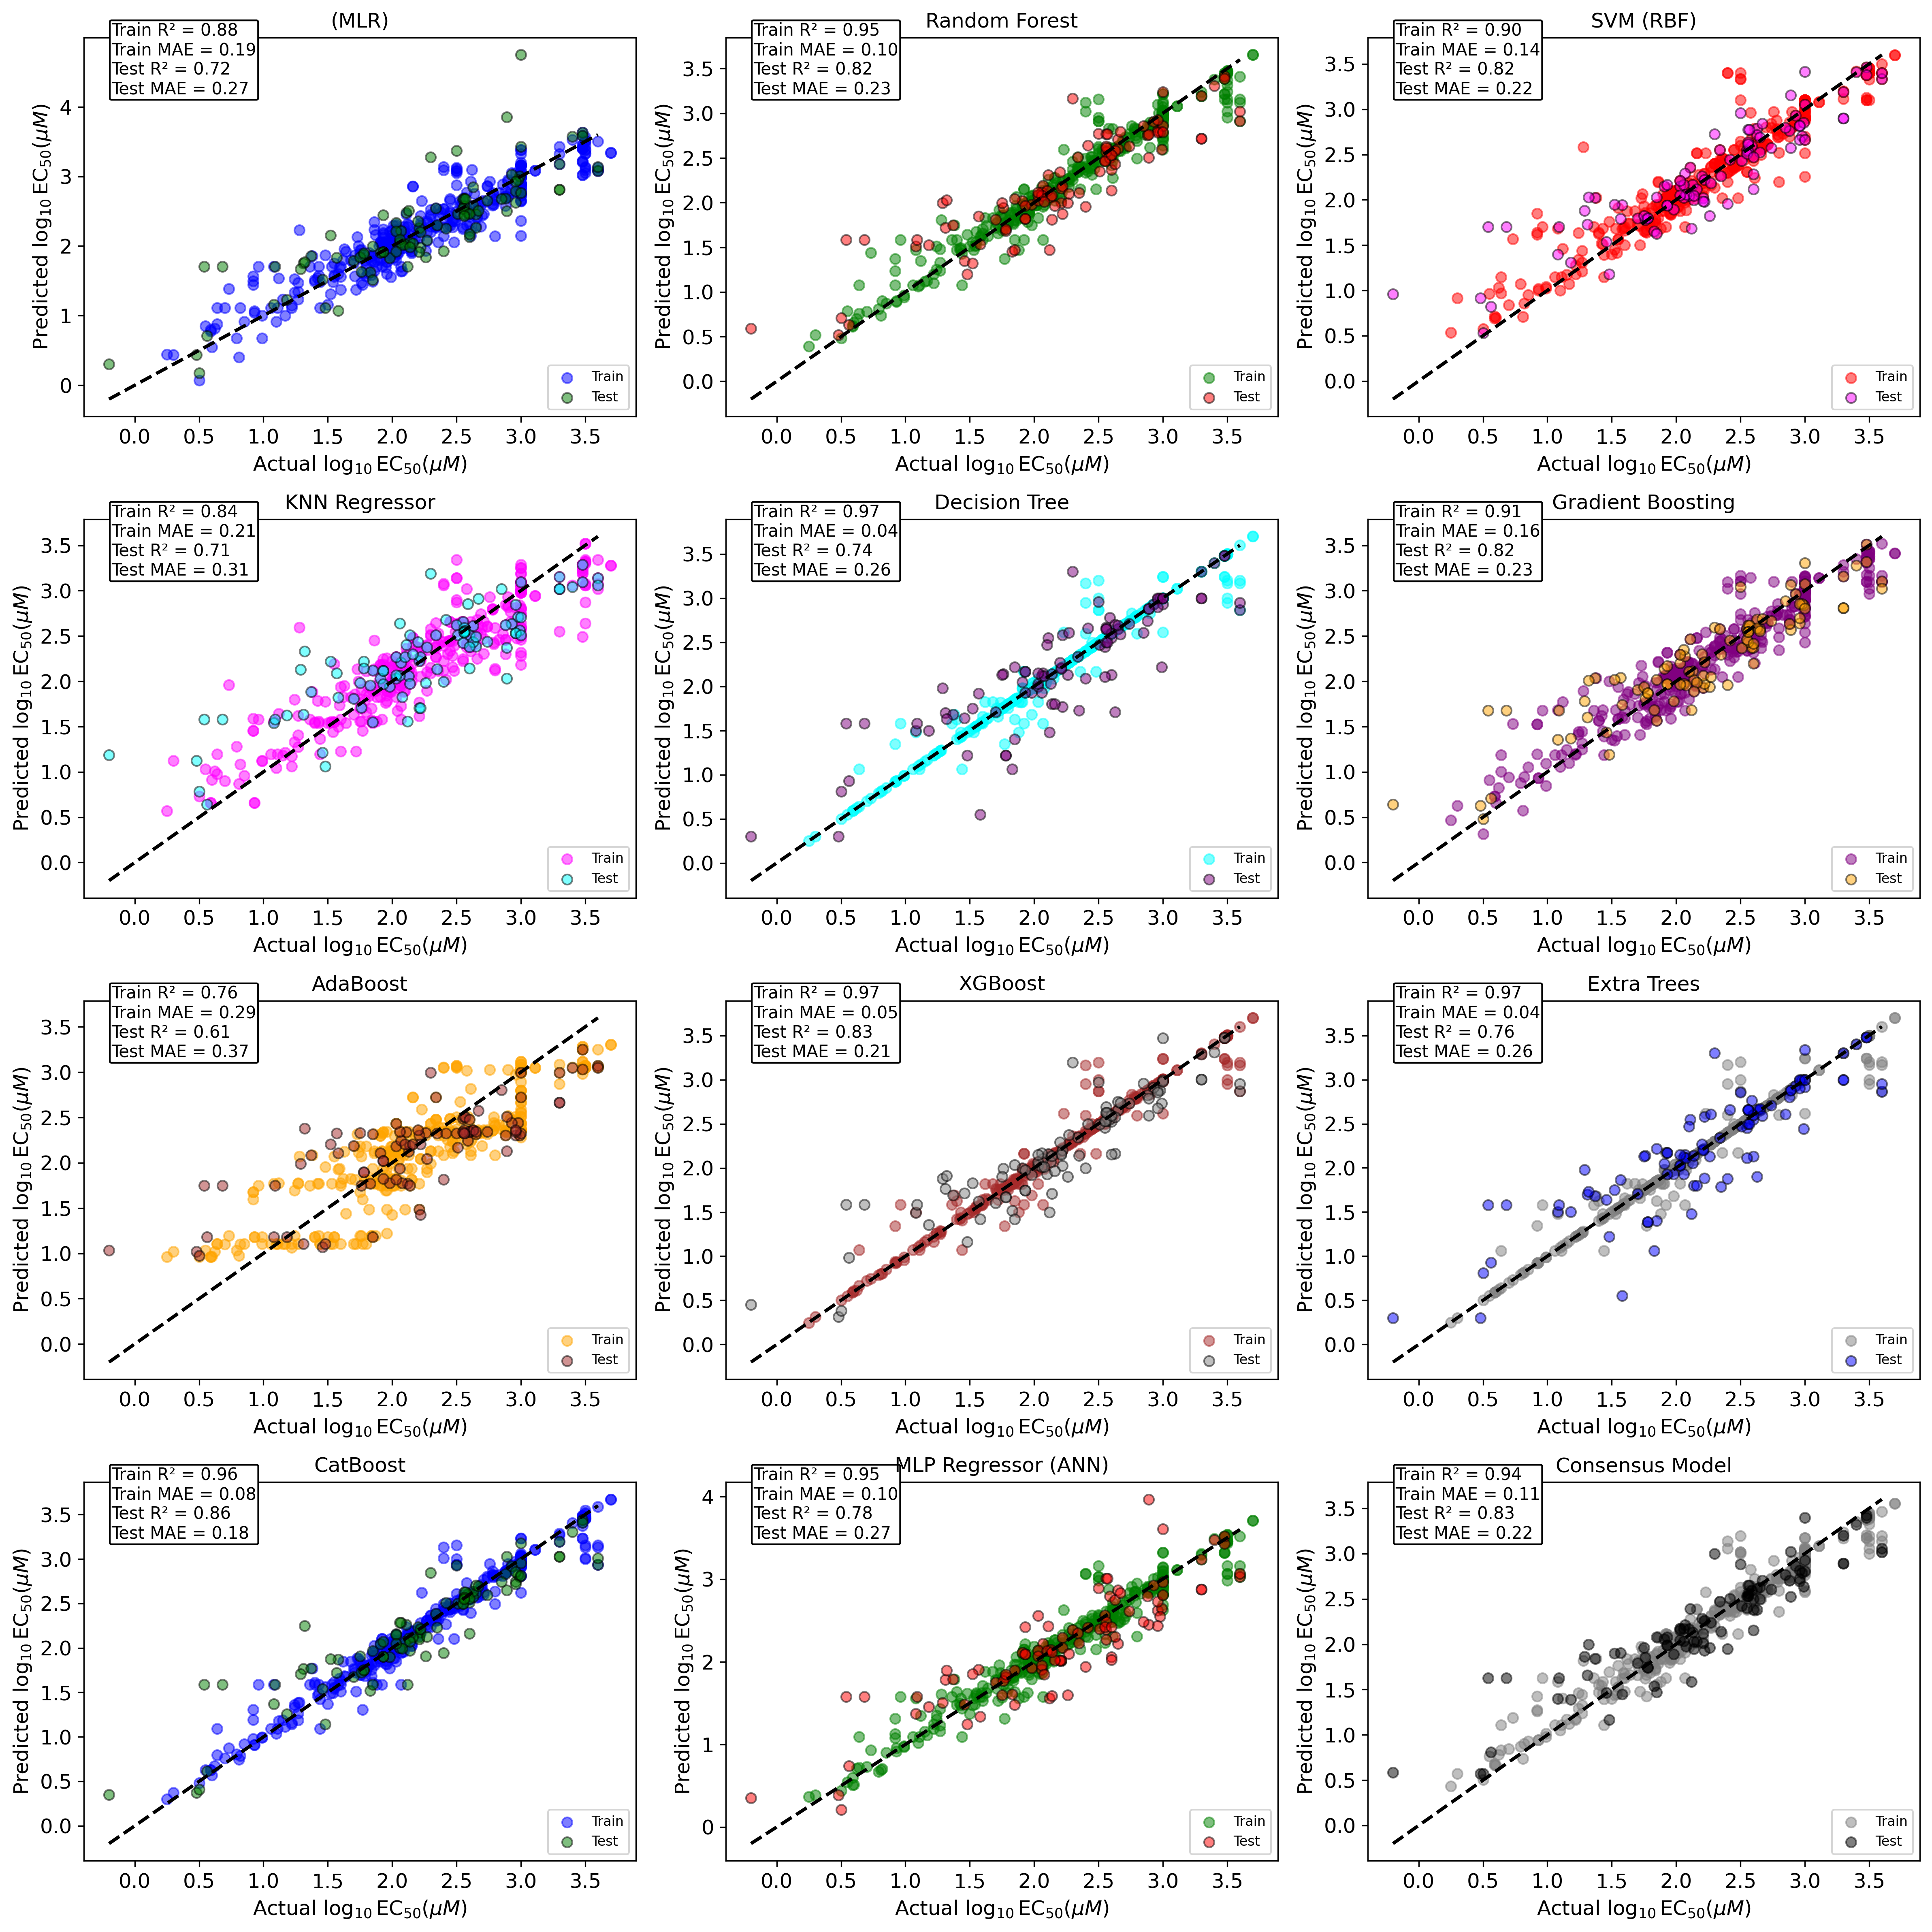

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define colors for plotting
colors = ['blue', 'green', 'red', 'magenta', 'cyan', 'purple', 'orange', 'brown', 'gray']

# Set the figure's DPI and size
plt.figure(figsize=(16, 16), dpi=300)

# Prepare for subplots
num_models = len(models) + 1  # Include the consensus model
num_cols = 3
num_rows = math.ceil(num_models / num_cols)

# Initialize consensus predictions
train_preds = []
test_preds = []

for i, (name, model) in enumerate(models.items()):
    # Predictions
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)
    
    # Collect for consensus
    train_preds.append(y_train_pred)
    test_preds.append(y_test_pred)
    
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5, color=colors[i % len(colors)], label='Train')
    plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='k', color=colors[(i + 1) % len(colors)], label='Test')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    
    plt.xlabel(r'Actual $\log_{10} \mathrm{EC}_{50} (\mu M)$', fontsize=12)
    plt.ylabel(r'Predicted $\log_{10} \mathrm{EC}_{50} (\mu M)$', fontsize=12)
    plt.title(f'{name}', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    plt.text(
        0.05, 0.85,
        f'Train R² = {train_r2:.2f}\nTrain MAE = {train_mae:.2f}\n'
        f'Test R² = {test_r2:.2f}\nTest MAE = {test_mae:.2f}',
        transform=plt.gca().transAxes, fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1')
    )
    
    plt.legend(loc='lower right', fontsize=8)

# Consensus model
y_train_consensus = np.mean(train_preds, axis=0)
y_test_consensus = np.mean(test_preds, axis=0)

plt.subplot(num_rows, num_cols, num_models)
plt.scatter(y_train, y_train_consensus, alpha=0.5, color='gray', label='Train')
plt.scatter(y_test, y_test_consensus, alpha=0.5, edgecolors='k', color='black', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel(r'Actual $\log_{10} \mathrm{EC}_{50} (\mu M)$', fontsize=12)
plt.ylabel(r'Predicted $\log_{10} \mathrm{EC}_{50} (\mu M)$', fontsize=12)
plt.title('Consensus Model', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Consensus metrics
consensus_train_r2 = r2_score(y_train, y_train_consensus)
consensus_test_r2 = r2_score(y_test, y_test_consensus)
consensus_train_mae = mean_absolute_error(y_train, y_train_consensus)
consensus_test_mae = mean_absolute_error(y_test, y_test_consensus)

plt.text(
    0.05, 0.85,
    f'Train R² = {consensus_train_r2:.2f}\nTrain MAE = {consensus_train_mae:.2f}\n'
    f'Test R² = {consensus_test_r2:.2f}\nTest MAE = {consensus_test_mae:.2f}',
    transform=plt.gca().transAxes, fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1')
)

plt.legend(loc='lower right', fontsize=8)

# Final layout and save
plt.tight_layout()
plt.savefig('lasso_finger_acetyl.png', dpi=300)
plt.show()


In [19]:
import pandas as pd

# Save the results in a readable TXT format
with open('lasso_finger_acetyl.txt', 'w') as f:
    for name, metrics in results.items():
        f.write(f'{name}:\n')
        f.write('-- Training --\n')
        f.write(f"MSE: {metrics['Train MSE']}, MAE: {metrics['Train MAE']}, RMSE: {metrics['Train RMSE']}, R^2: {metrics['Train R^2']}\n")
        f.write('-- Testing --\n')
        f.write(f"MSE: {metrics['Test MSE']}, MAE: {metrics['Test MAE']}, RMSE: {metrics['Test RMSE']}, R^2: {metrics['Test R^2']}\n\n")

    # Add Consensus Model
    f.write('Consensus Model:\n')
    f.write('-- Training --\n')
    f.write(f"MSE: {consensus_train_mse}, MAE: {consensus_train_mae}, RMSE: {consensus_train_rmse}, R^2: {consensus_train_r2}\n")
    f.write('-- Testing --\n')
    f.write(f"MSE: {consensus_test_mse}, MAE: {consensus_test_mae}, RMSE: {consensus_test_rmse}, R^2: {consensus_test_r2}\n")

print("Model metrics saved to lasso_finger_acetyl.txt")

Model metrics saved to lasso_finger_acetyl.txt


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

param_grid_knn = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute'],  # brute is needed for some metrics like 'cosine'
    'leaf_size': list(range(10, 100, 1)),  # Smaller step for efficiency
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

# Step 2: Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Step 3: Perform GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=param_grid_knn,
                               cv=3,  # 3-fold cross-validation
                               n_jobs=25,  # Use all available cores
                               scoring='accuracy',  # Optimize for accuracy
                               verbose=1)  # Print progress during the search

# Step 4: Record runtime
start_time_knn = time.time()
grid_search_knn.fit(X_train_rfecv, y_train_re)
end_time_knn = time.time()

# Step 5: Retrieve the best hyperparameters for KNN
print(f"Total Runtime for Grid Search (KNN): {end_time_knn - start_time_knn:.2f} seconds")
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)


# Step 6: Train KNN with best hyperparameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)
best_knn.fit(X_train_rfecv, y_train_re)

# Step 7: Evaluate on Training and Test Sets
y_train_pred_knn = best_knn.predict(X_train_rfecv)
y_test_pred_knn = best_knn.predict(X_test_rfecv)

train_accuracy_knn = accuracy_score(y_train_re, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print(f"\nBest KNN Accuracy on Training Set: {train_accuracy_knn:.4f}")
print(f"Best KNN Accuracy on Test Set: {test_accuracy_knn:.4f}\n")


print(f"Classification Report (Training Set):\n{classification_report(y_train_re, y_train_pred_knn)}")

cm_train_knn = confusion_matrix(y_train_re, y_train_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_knn, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Binder", "Binder"], yticklabels=["Non-Binder", "Binder"])
plt.title("Confusion Matrix for Best KNN (Training Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Step 8: Classification Report and Confusion Matrices for KNN
print(f"Classification Report (Test Set):\n{classification_report(y_test, y_test_pred_knn)}")

# Confusion matrix for test set (KNN)
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Binder", "Binder"], yticklabels=["Non-Binder", "Binder"])
plt.title("Confusion Matrix for Best KNN (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
